In [213]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [214]:
data = pd.read_csv('online_retail_II(2010-2011).csv',encoding='latin1')

In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  object 
 5   Price        541910 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      541910 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [216]:
data.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [217]:
missing=data[data['Customer ID'].isna()]

In [218]:
missing.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
622,536414,22139,NaN,56,01-12-2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,01-12-2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,01-12-2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,01-12-2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,01-12-2010 14:32,1.66,NaN,United Kingdom


In [219]:
total_revenue = (data['Quantity'] * data['Price']).sum()

In [220]:
total_revenue

9747765.934

In [221]:
#The revenue of the records where customerid was missing
missing_revenue=(missing['Quantity'] * missing['Price']).sum()

In [222]:
missing_revenue

1447682.1199999996

In [223]:
missing_revenue/total_revenue *100

14.851424724413162

The missing revenue is ~15% of the total_revenue which is quite significant so we can not delete those records and now we will fill those with anonymous values

In [224]:
data.loc[data['Customer ID'].isna(), 'Customer ID'] = 'Anonymous'

In [225]:
data[data['Customer ID'].isna()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [226]:
data.drop_duplicates(inplace=True)

In [227]:
data.dropna(subset=['InvoiceDate', 'Quantity', 'Price'], inplace=True)

In [228]:
data.isnull().sum()

Invoice           0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
Price             0
Customer ID       0
Country           0
dtype: int64

We do not need to deal with description as it doesnt help in predicting CLV

In [229]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Quantity'] = pd.to_numeric(data['Quantity'])
data['Price'] = pd.to_numeric(data['Price'])

In [230]:
data['TotalRevenue'] = data['Quantity'] * data['Price']

In [231]:
data['InvoiceYear'] = data['InvoiceDate'].dt.year
data['InvoiceMonth'] = data['InvoiceDate'].dt.month
data['InvoiceDay'] = data['InvoiceDate'].dt.day

In [232]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalRevenue,InvoiceYear,InvoiceMonth,InvoiceDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,1,12
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,1,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,1,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,1,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,1,12


In [233]:
customer_data = data.groupby('Customer ID').agg({
    'Invoice': 'nunique',
    'Quantity': 'sum',
    'TotalRevenue': 'sum',
    'InvoiceDate': ['min', 'max']
}).reset_index()

This part groups the data by the Customer ID column. Each group corresponds to a unique customer.

'Invoice': 'nunique' calculates the number of unique invoices for each customer. This gives the number of transactions made by each customer.

'Quantity': 'sum' sums the Quantity column for each customer, resulting in the total quantity of items purchased by each customer.

'TotalRevenue': 'sum' sums the TotalRevenue column for each customer, providing the total revenue generated by each customer.

'InvoiceDate': ['min', 'max'] calculates the earliest (min) and latest (max) invoice dates for each customer, indicating the first and last purchase dates.

In [234]:
customer_data.tail()

Customer ID Invoice Quantity TotalRevenue         InvoiceDate  \
                 nunique      sum          sum                 min   
4368     18281.0       1       54        80.82 2011-12-06 10:53:00   
4369     18282.0       3       98       176.60 2011-02-12 11:43:00   
4370     18283.0      16     1357      2045.53 2011-01-23 14:58:00   
4371     18287.0       3     1586      1837.28 2011-05-22 10:39:00   
4372   Anonymous    3710   269651   1447487.53 2010-01-12 11:52:00   

                          
                     max  
4368 2011-12-06 10:53:00  
4369 2011-09-08 15:10:00  
4370 2011-11-30 12:59:00  
4371 2011-12-10 10:23:00  
4372 2011-12-10 16:42:00

In [235]:
customer_data.reset_index()

index Customer ID Invoice Quantity TotalRevenue         InvoiceDate  \
                       nunique      sum          sum                 min   
0        0     12346.0       2        0         0.00 2011-01-18 10:01:00   
1        1     12347.0       7     2458      4310.00 2010-07-12 14:57:00   
2        2     12348.0       4     2341      1797.24 2010-12-16 19:09:00   
3        3     12349.0       1      631      1757.55 2011-11-21 09:51:00   
4        4     12350.0       1      197       334.40 2011-02-02 16:01:00   
...    ...         ...     ...      ...          ...                 ...   
4368  4368     18281.0       1       54        80.82 2011-12-06 10:53:00   
4369  4369     18282.0       3       98       176.60 2011-02-12 11:43:00   
4370  4370     18283.0      16     1357      2045.53 2011-01-23 14:58:00   
4371  4371     18287.0       3     1586      1837.28 2011-05-22 10:39:00   
4372  4372   Anonymous    3710   269651   1447487.53 2010-01-12 11:52:00   

                          
                     max  
0    2011-01-18 10:17:00  
1    2011-10-31 12:25:00  
2    2011-09-25 13:13:00  
3    2011-11-21 09:51:00  
4    2011-02-02 16:01:00  
...                  ...  
4368 2011-12-06 10:53:00  
4369 2011-09-08 15:10:00  
4370 2011-11-30 12:59:00  
4371 2011-12-10 10:23:00  
4372 2011-12-10 16:42:00  

[4373 rows x 7 columns]

In [236]:
customer_data.columns = ['CustomerID', 'NumTransactions', 'TotalQuantity', 'TotalRevenue', 'FirstPurchaseDate', 'LastPurchaseDate']

In [237]:
import matplotlib.pyplot as plt
import seaborn as sns

In [238]:
customer_data['AOV'] = customer_data['TotalRevenue'] / customer_data['NumTransactions']
customer_data['CustomerAge'] = (customer_data['LastPurchaseDate'] - customer_data['FirstPurchaseDate']).dt.days
customer_data['PurchaseFrequency'] = customer_data['NumTransactions'] / customer_data['CustomerAge']


In [239]:
customer_data

,CustomerID,NumTransactions,TotalQuantity,TotalRevenue,FirstPurchaseDate,LastPurchaseDate,AOV,CustomerAge,PurchaseFrequency
0,12346.0,2,0,0.00,2011-01-18 10:01:00,2011-01-18 10:17:00,0.000000,0,inf
1,12347.0,7,2458,4310.00,2010-07-12 14:57:00,2011-10-31 12:25:00,615.714286,475,0.014737
2,12348.0,4,2341,1797.24,2010-12-16 19:09:00,2011-09-25 13:13:00,449.310000,282,0.014184
3,12349.0,1,631,1757.55,2011-11-21 09:51:00,2011-11-21 09:51:00,1757.550000,0,inf
4,12350.0,1,197,334.40,2011-02-02 16:01:00,2011-02-02 16:01:00,334.400000,0,inf
...,...,...,...,...,...,...,...,...,...
4368,18281.0,1,54,80.82,2011-12-06 10:53:00,2011-12-06 10:53:00,80.820000,0,inf
4369,18282.0,3,98,176.60,2011-02-12 11:43:00,2011-09-08 15:10:00,58.866667,208,0.014423
4370,18283.0,16,1357,2045.53,2011-01-23 14:58:00,2011-11-30 12:59:00,127.845625,310,0.051613
4371,18287.0,3,1586,1837.28,2011-05-22 10:39:00,2011-12-10 10:23:00,612.426667,201,0.014925


In [240]:
#There are cases where CustomerAge is zero. We will replace them by 1 to avoid PurchaseFreq to be inf

In [241]:
customer_data['CustomerAge'] = customer_data['CustomerAge'].replace(0, 1)

In [242]:
customer_data['PurchaseFrequency'] = customer_data['NumTransactions'] / customer_data['CustomerAge']

In [243]:
customer_data

,CustomerID,NumTransactions,TotalQuantity,TotalRevenue,FirstPurchaseDate,LastPurchaseDate,AOV,CustomerAge,PurchaseFrequency
0,12346.0,2,0,0.00,2011-01-18 10:01:00,2011-01-18 10:17:00,0.000000,1,2.000000
1,12347.0,7,2458,4310.00,2010-07-12 14:57:00,2011-10-31 12:25:00,615.714286,475,0.014737
2,12348.0,4,2341,1797.24,2010-12-16 19:09:00,2011-09-25 13:13:00,449.310000,282,0.014184
3,12349.0,1,631,1757.55,2011-11-21 09:51:00,2011-11-21 09:51:00,1757.550000,1,1.000000
4,12350.0,1,197,334.40,2011-02-02 16:01:00,2011-02-02 16:01:00,334.400000,1,1.000000
...,...,...,...,...,...,...,...,...,...
4368,18281.0,1,54,80.82,2011-12-06 10:53:00,2011-12-06 10:53:00,80.820000,1,1.000000
4369,18282.0,3,98,176.60,2011-02-12 11:43:00,2011-09-08 15:10:00,58.866667,208,0.014423
4370,18283.0,16,1357,2045.53,2011-01-23 14:58:00,2011-11-30 12:59:00,127.845625,310,0.051613
4371,18287.0,3,1586,1837.28,2011-05-22 10:39:00,2011-12-10 10:23:00,612.426667,201,0.014925


In [244]:
sns.set(style="whitegrid")

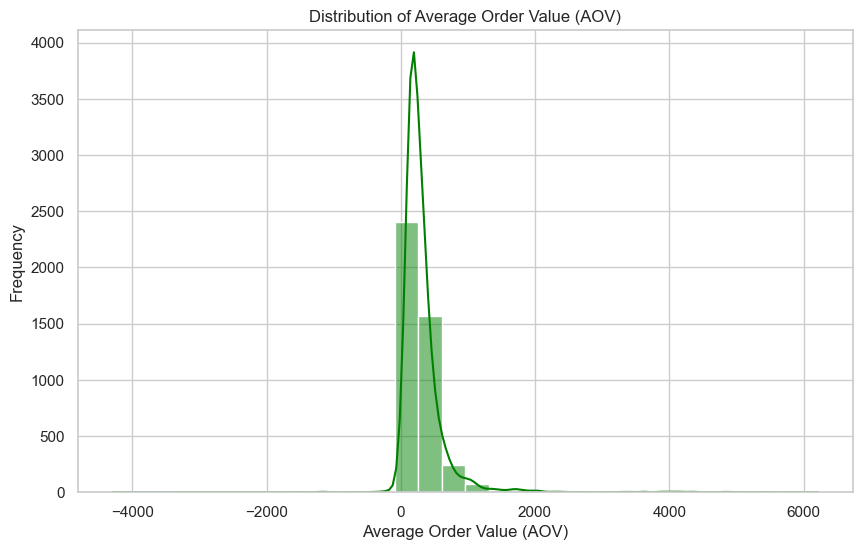

In [245]:
# 1. Distribution of Average Order Value (AOV)
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['AOV'], kde=True, bins=30, color='green')
plt.title('Distribution of Average Order Value (AOV)')
plt.xlabel('Average Order Value (AOV)')
plt.ylabel('Frequency')
plt.show()

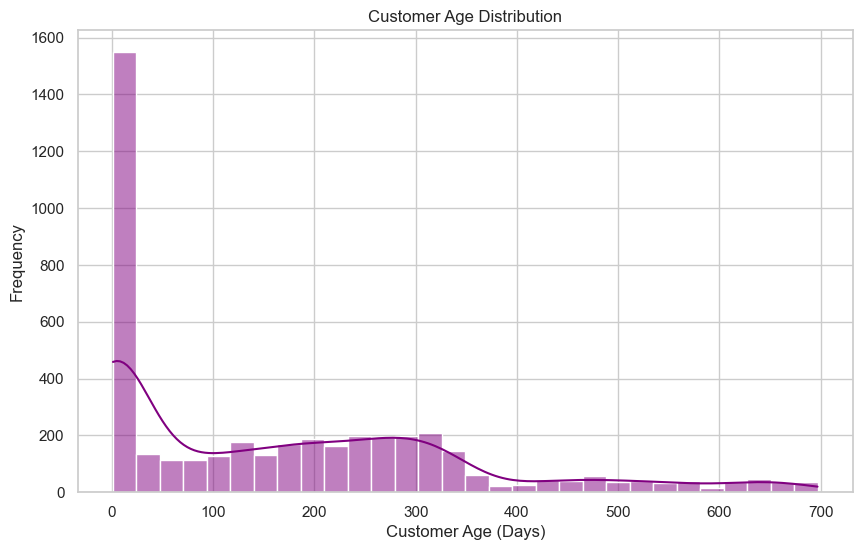

In [246]:
# 2. Customer Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['CustomerAge'], kde=True, bins=30, color='purple')
plt.title('Customer Age Distribution')
plt.xlabel('Customer Age (Days)')
plt.ylabel('Frequency')
plt.show()

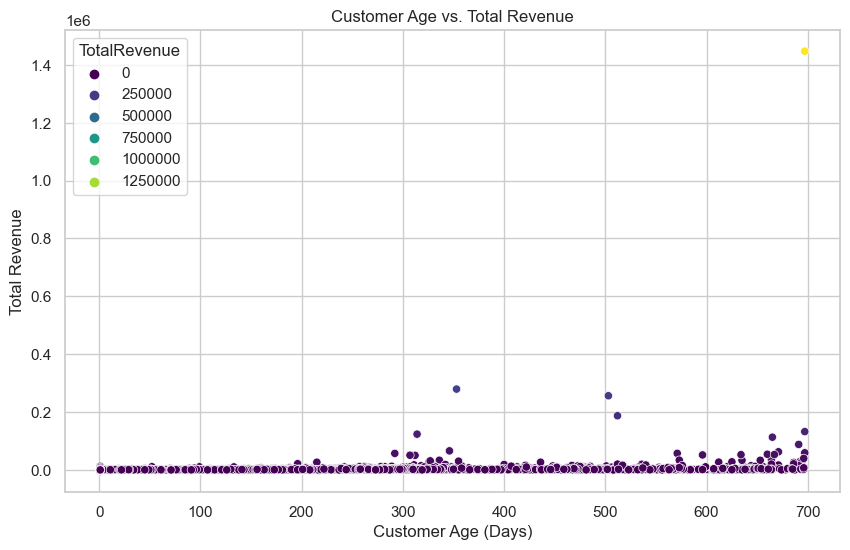

In [247]:
# 3. Relationship between Customer Age and Total Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='CustomerAge', y='TotalRevenue', hue='TotalRevenue', palette='viridis')
plt.title('Customer Age vs. Total Revenue')
plt.xlabel('Customer Age (Days)')
plt.ylabel('Total Revenue')
plt.show()

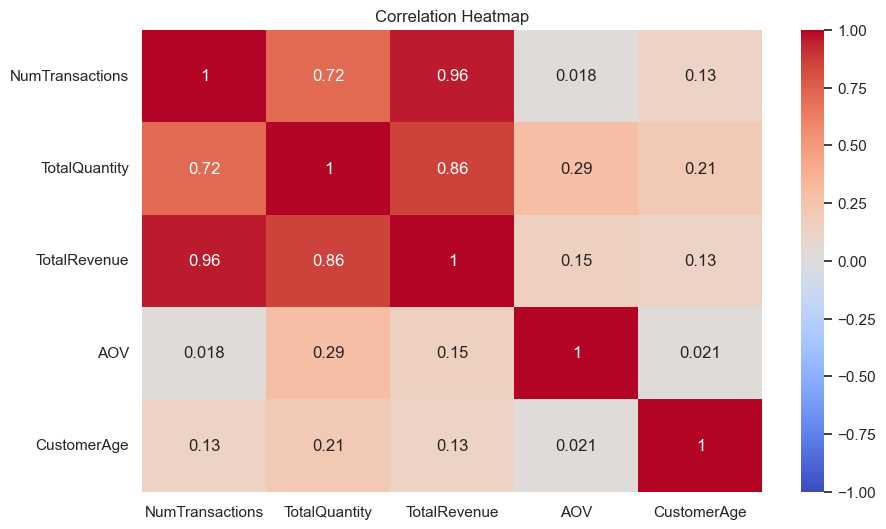

In [248]:
# 4. Correlation Heatmap
correlation_matrix = customer_data[['NumTransactions', 'TotalQuantity', 'TotalRevenue', 'AOV', 'CustomerAge']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# CLV=AOV×Purchase Frequency×Customer Lifespan

In [249]:
customer_data['Lifespan'] = 365  # Assume 1 year

customer_data['CLV'] = customer_data['AOV'] * customer_data['PurchaseFrequency'] * customer_data['Lifespan']

In [250]:
customer_data

,CustomerID,NumTransactions,TotalQuantity,TotalRevenue,FirstPurchaseDate,LastPurchaseDate,AOV,CustomerAge,PurchaseFrequency,Lifespan,CLV
0,12346.0,2,0,0.00,2011-01-18 10:01:00,2011-01-18 10:17:00,0.000000,1,2.000000,365,0.000000
1,12347.0,7,2458,4310.00,2010-07-12 14:57:00,2011-10-31 12:25:00,615.714286,475,0.014737,365,3311.894737
2,12348.0,4,2341,1797.24,2010-12-16 19:09:00,2011-09-25 13:13:00,449.310000,282,0.014184,365,2326.214894
3,12349.0,1,631,1757.55,2011-11-21 09:51:00,2011-11-21 09:51:00,1757.550000,1,1.000000,365,641505.750000
4,12350.0,1,197,334.40,2011-02-02 16:01:00,2011-02-02 16:01:00,334.400000,1,1.000000,365,122056.000000
...,...,...,...,...,...,...,...,...,...,...,...
4368,18281.0,1,54,80.82,2011-12-06 10:53:00,2011-12-06 10:53:00,80.820000,1,1.000000,365,29499.300000
4369,18282.0,3,98,176.60,2011-02-12 11:43:00,2011-09-08 15:10:00,58.866667,208,0.014423,365,309.899038
4370,18283.0,16,1357,2045.53,2011-01-23 14:58:00,2011-11-30 12:59:00,127.845625,310,0.051613,365,2408.446613
4371,18287.0,3,1586,1837.28,2011-05-22 10:39:00,2011-12-10 10:23:00,612.426667,201,0.014925,365,3336.354229


We will use a simple linear regression model:

Feature Selection: Choose relevant features.

Split Data: Split the data into training and testing sets.

Train Model: Train a regression model.

Evaluate Model: Evaluate the model using appropriate metrics (e.g., RMSE, MAE).

In [251]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [252]:
features = ['NumTransactions', 'TotalQuantity', 'AOV', 'PurchaseFrequency', 'CustomerAge']

In [253]:
X = customer_data[features]
y = customer_data['CLV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [254]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [255]:
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)


In [256]:
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

RMSE: 166021.46060925451
MAE: 40810.51392229621


In [257]:
def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred))) * 100

In [258]:
symmetric_mean_absolute_percentage_error(y_test, y_pred)

126.68570133992452

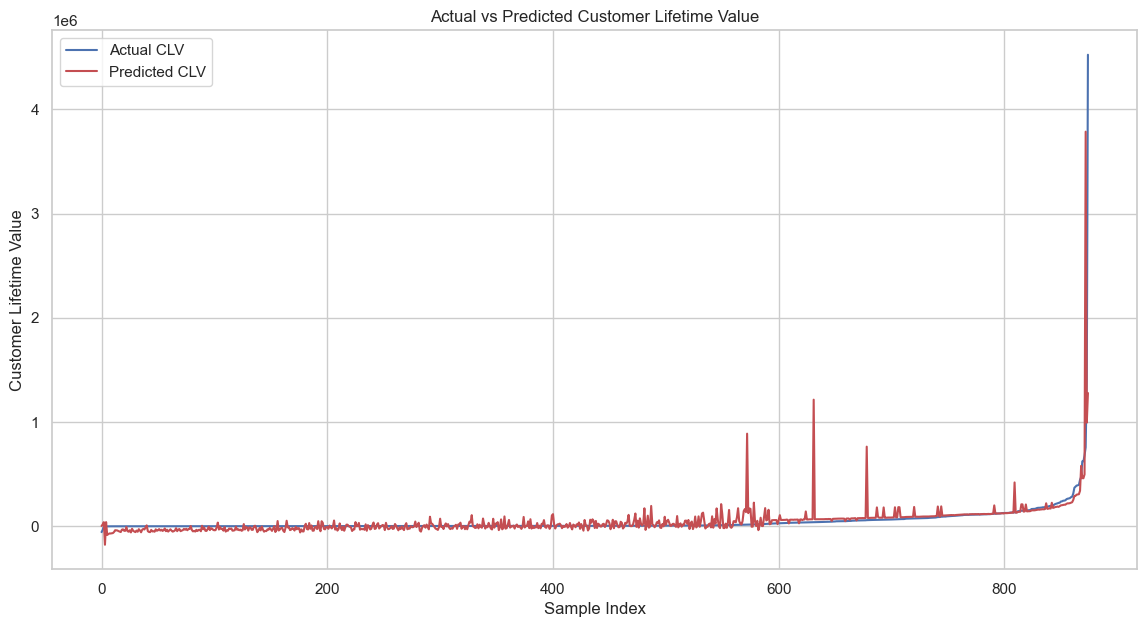

In [259]:
y_test_array = np.array(y_test)
y_pred_array = np.array(y_pred)

sorted_indices = np.argsort(y_test_array)
y_test_sorted = y_test_array[sorted_indices]
y_pred_sorted = y_pred_array[sorted_indices]

plt.figure(figsize=(14, 7))
plt.plot(y_test_sorted, label='Actual CLV', color='b')
plt.plot(y_pred_sorted, label='Predicted CLV', color='r')
plt.xlabel('Sample Index')
plt.ylabel('Customer Lifetime Value')
plt.title('Actual vs Predicted Customer Lifetime Value')
plt.legend()
plt.show()

High values of RMSE, MAE, sMAPE suggest that the model's predictions are not very accurate.

# RFM MODEL

features for modeling.

Recency: Time since last purchase.
    
Frequency: Number of purchases in a given period.
    
Monetary: Total spend in a given period.

In [260]:
import pandas as pd
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [261]:
df = pd.read_csv('online_retail_II(2010-2011).csv',encoding='latin1')

In [262]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['TotalAmount'] = df['Quantity'] * df['Price']


In [263]:
snapshot_date = df['InvoiceDate'].max() + timedelta(days=1)

rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'Invoice': 'nunique',  # Frequency
    'TotalAmount': 'sum'  # Monetary
}).reset_index()

In [264]:
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'Invoice': 'nunique',  # Frequency
    'TotalAmount': 'sum'  # Monetary
}).reset_index()

In [265]:
merged_df = pd.merge(df, rfm[['Customer ID', 'Invoice', 'TotalAmount']], on='Customer ID', how='left')

In [266]:
merged_df['R_Score'] = pd.qcut(rfm['InvoiceDate'], 5, labels=False, duplicates='drop')
merged_df['F_Score'] = pd.qcut(rfm['Invoice'], 5, labels=False, duplicates='drop')
merged_df['M_Score'] = pd.qcut(rfm['TotalAmount'], 5, labels=False, duplicates='drop')

In [267]:
merged_df.dropna(subset=['R_Score', 'F_Score', 'M_Score'], inplace=True)


In [268]:
X = merged_df[['R_Score', 'F_Score', 'M_Score']]  # Features: RFM scores
y = merged_df['TotalAmount_x']  # Target variable: Adjust based on your CLV definition

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 3. Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [270]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 1139.8727010911307


In [271]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

In [272]:
rmse


33.7620008454939

In [273]:
mae

15.905104363511317

In [274]:
symmetric_mean_absolute_percentage_error(y_test, y_pred)

89.35552622695455

The error metrics have reduced by significant value...